In [1]:
import pandas as pd
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
import statsmodels.api as sm
import pylab as py
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pingouin as pg
import statsmodels.formula.api as smf

In [2]:
photo_food = pd.read_csv('/home/jupyter-o-demchenko-18/statistic/Lesson5/5_task_1.csv')

In [3]:
photo_food.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


3. Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

Hint: scipy.stats.levene либо pingouin.homoscedasticity

In [4]:
# задаем группы в переменные
A = photo_food[photo_food['group'] == 'A']['events']
B = photo_food[photo_food['group'] == 'B']['events']
C = photo_food[photo_food['group'] == 'C']['events']

In [5]:
# Тест Левена для групп 
ss.levene(A, B, C)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [6]:
# pvalue=0.1041327199523974 - не значимый результат, нельзя опровергнуть нулевую гипотезу. дисперсии гомогенны

Также убедитесь, что данные распределены нормально, применив тест Шапиро-Уилка. Перед применением критерия при проверке на нормальность обязательно сделайте семплирование (1000 наблюдений), так как на больших выборках могут получаться неверные результаты. Для воспроизводимости результата используйте параметр random_state=17 в методе sample.

Дополнительно: попробуйте посчитать тест Шапиро-Уилка без использования метода sample. Сравните  результат с normaltest, а также qq-графиками. Какой вывод можно сделать по совокупности этих методов?

Выберите верные утверждения:

In [7]:
# 1. Вариант без семплирования

In [8]:
ss.shapiro(A)

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9989418387413025, pvalue=4.318870651331963e-06)

In [9]:
ss.shapiro(B)

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


ShapiroResult(statistic=0.9990161061286926, pvalue=1.0504894817131571e-05)

In [10]:
ss.shapiro(C)

ShapiroResult(statistic=0.9989210963249207, pvalue=3.3885160064528463e-06)

In [11]:
# 1. Вариант c семплированием

In [12]:
AA = photo_food[photo_food['group'] == 'A']['events'].sample(1000, random_state=17)
BB = photo_food[photo_food['group'] == 'B']['events'].sample(1000, random_state=17)
CC = photo_food[photo_food['group'] == 'C']['events'].sample(1000, random_state=17)


In [13]:
ss.shapiro(AA)

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [14]:
ss.shapiro(BB)

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [15]:
ss.shapiro(CC)

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

Вывод: все распределения нормальные (в двух примененных методоах)

5. Самое время провести тест! 

In [16]:
ss.f_oneway(A, B, C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

Дополнительно: попробуйте другие варианты поправок на множественные сравнения через pingouin. Дают ли они те же выводы, что и Тьюки?

In [17]:
# Тест Тьюки .summary() - для отображения таблицы
tukey_test = pairwise_tukeyhsd(photo_food["events"], photo_food["group"]).summary()

In [18]:
tukey_test
# столбец reject, если True - различия значимы

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [19]:
# Столбец **meandiff** отражает различие в средних между **второй и первой группой, именно в таком порядке.**

Вывод: наибольшие различия гр В. 

In [20]:
button_format = pd.read_csv('/home/jupyter-o-demchenko-18/statistic/Lesson5/5_task_2.csv')

In [21]:
button_format.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп. Соотнесите графики распределения и экспериментальные группы:



In [22]:
test_group = button_format[button_format['group'] == 'test']['events']
control_group = button_format[button_format['group'] == 'control']['events']


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


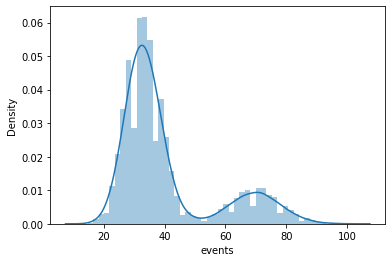

In [23]:
sns.distplot(test_group)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


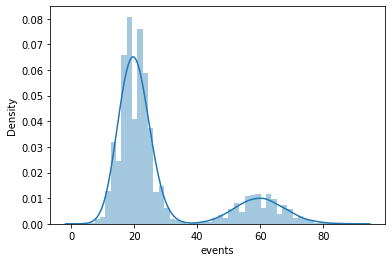

In [24]:
sns.distplot(control_group)

Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2 знаков после точки.

In [25]:
test_group_high = button_format[button_format['group'] == 'test'][button_format['segment'] == 'high']['events']
test_group_low = button_format[button_format['group'] == 'test'][button_format['segment'] == 'low']['events']
control_group_high = button_format[button_format['group'] == 'control'][button_format['segment'] == 'high']['events']
control_group_low = button_format[button_format['group'] == 'control'][button_format['segment'] == 'low']['events']

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [26]:
test_group_high.describe()

count    10000.000000
mean        69.938500
std          8.403974
min         40.000000
25%         64.000000
50%         70.000000
75%         76.000000
max        102.000000
Name: events, dtype: float64

In [27]:
test_group_low.describe()

count    40000.000000
mean        33.025925
std          5.720845
min         13.000000
25%         29.000000
50%         33.000000
75%         37.000000
max         59.000000
Name: events, dtype: float64

In [28]:
control_group_high.describe()

count    10000.000000
mean        59.970800
std          7.805347
min         31.000000
25%         55.000000
50%         60.000000
75%         65.000000
max         89.000000
Name: events, dtype: float64

In [29]:
control_group_low.describe()

count    40000.000000
mean        20.031575
std          4.473576
min          4.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         41.000000
Name: events, dtype: float64

12. между какими группами есть статистически значимые различия.

Сначала мы используем функцию `smf.ols()` из `statsmodels` , где первым аргументом мы указываем формулу из прошлого задания, вторым - набор данных, а затем используем на ней метод `.fit()` .

Результат мы даём в функцию `anova_lm` оттуда же и указываем аргумент `typ = 2` .

events ~ segment + group + segment:group

In [30]:
formula = smf.ols(formula='events ~ segment + group + segment:group', data=button_format).fit()

In [31]:
# выводим таблицу
table = sm.stats.anova_lm(formula, typ=2)
print(table)

                     sum_sq       df              F         PR(>F)
segment        2.362480e+07      1.0  689756.377484   0.000000e+00
group          3.837195e+06      1.0  112031.864119   0.000000e+00
segment:group  3.664244e+04      1.0    1069.823273  2.060261e-233
Residual       3.424956e+06  99996.0            NaN            NaN


В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey:

In [32]:
# создадим колонку комбинации тестов
button_format['combination'] = button_format['group'] + ' \ ' + button_format['segment']

In [33]:
button_format

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high
...,...,...,...,...,...
99995,60695,control,low,15.0,control \ low
99996,5934,control,low,16.0,control \ low
99997,30046,control,low,22.0,control \ low
99998,26474,control,low,21.0,control \ low


In [34]:
tukey_test_button = pairwise_tukeyhsd(button_format["events"], button_format["combination"]).summary()

In [35]:
tukey_test_button

group1,group2,meandiff,p-adj,lower,upper,reject
control \ high,control \ low,-39.9392,0.001,-40.1073,-39.7711,True
control \ high,test \ high,9.9677,0.001,9.7551,10.1803,True
control \ high,test \ low,-26.9449,0.001,-27.113,-26.7768,True
control \ low,test \ high,49.9069,0.001,49.7388,50.075,True
control \ low,test \ low,12.9944,0.001,12.888,13.1007,True
test \ high,test \ low,-36.9126,0.001,-37.0807,-36.7445,True


Визуализируйте результаты теста и заполните пропуски:

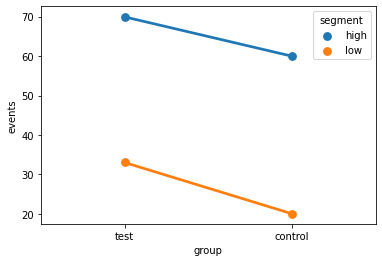

In [38]:
ax = sns.pointplot(x="group", y="events", hue="segment",
                   data=button_format)